# Mini-Lab: Supervised and Unsupervised Learning Practice
## Guided Practice Notebook

---

## Learning Objectives

By completing this mini-lab, you will be able to:
1. Apply supervised and unsupervised learning techniques to real datasets
2. Frame appropriate machine learning tasks from data
3. Implement data cleaning and preprocessing pipelines
4. Train and evaluate multiple supervised learning models
5. Apply clustering (K-Means) and dimensionality reduction (PCA)
6. Interpret results and extract meaningful insights

---

## Instructions

This is a **guided practice** notebook where you will:
- Choose one dataset from the provided options
- Frame both a **supervised learning task** and an **unsupervised learning task**
- Complete code cells marked with `# TODO:` comments
- Train models, evaluate performance, and interpret results

**Time Estimate**: 2-3 hours

**Grading Criteria**:
- Code completion and correctness (40%)
- Model evaluation and interpretation (30%)
- Data cleaning and preprocessing quality (20%)
- Documentation and comments (10%)

---

## Dataset Options

Choose **ONE** of the following datasets for this lab:

### Option 1: Iris Dataset (EXAMPLE - DO NOT USE THIS)
- **Source**: Built-in sklearn dataset
- **Size**: 150 samples, 4 features
- **Task**: Classify iris species (3 classes)
- **Features**: Sepal length, sepal width, petal length, petal width
- **Difficulty**: ⭐ Easy

### Option 2: Wine Quality Dataset
- **Source**: UCI Machine Learning Repository (wine quality)
- **Size**: ~1,600 samples, 11 features
- **Task**: Predict wine quality (regression) or classify quality levels
- **Features**: Alcohol, acidity, pH, residual sugar, etc.
- **Difficulty**: ⭐⭐ Medium

### Option 3: Breast Cancer Wisconsin Dataset
- **Source**: Built-in sklearn dataset
- **Size**: 569 samples, 30 features
- **Task**: Classify tumors as benign or malignant
- **Features**: Various cell measurements
- **Difficulty**: ⭐⭐ Medium

### Option 4: California Housing Dataset
- **Source**: Built-in sklearn dataset
- **Size**: ~20,000 samples, 8 features
- **Task**: Predict median house value (regression)
- **Features**: Location, income, age, rooms, etc.
- **Difficulty**: ⭐⭐⭐ Advanced

---

## Part 1: Setup and Data Loading

### Step 1.1: Import Libraries

First, import all necessary libraries:


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            mean_squared_error, r2_score, confusion_matrix,
                            classification_report)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to start the mini-lab!")


Libraries imported successfully!
Ready to start the mini-lab!


### Step 1.2: Load Your Chosen Dataset

**TODO**: Uncomment and complete the code for your chosen dataset. Remove or comment out the other options.


In [2]:
# ============================================================================
# TODO: Choose ONE dataset and uncomment the corresponding code block
# ============================================================================

# OPTION 1: Iris Dataset (Recommended for beginners)
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['target_name'] = data.target_names[data.target]
print("Dataset: Iris")
print(f"Shape: {df.shape}")
print(f"Features: {list(df.columns[:-2])}")
print(f"Target classes: {list(data.target_names)}")

# OPTION 2: Wine Quality Dataset
# from sklearn.datasets import fetch_openml
# wine = fetch_openml(name='wine-quality-red', version=1, as_frame=True)
# df = wine.frame
# print("Dataset: Wine Quality")
# print(f"Shape: {df.shape}")

# OPTION 3: Breast Cancer Wisconsin Dataset
# from sklearn.datasets import load_breast_cancer
# data = load_breast_cancer()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target
# df['target_name'] = data.target_names[data.target]
# print("Dataset: Breast Cancer Wisconsin")
# print(f"Shape: {df.shape}")

# OPTION 4: California Housing Dataset
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing(as_frame=True)
# df = housing.frame
# print("Dataset: California Housing")
# print(f"Shape: {df.shape}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())


Dataset: Iris
Shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dty

### Step 1.3: Exploratory Data Analysis

**TODO**: Explore your dataset. Create visualizations to understand the data distribution, relationships, and any potential issues.


In [3]:
# ============================================================================
# TODO: Perform exploratory data analysis
# - Check for missing values
# - Visualize feature distributions
# - Check for outliers
# - Examine relationships between features
# - Visualize target variable distribution (if applicable)
# ============================================================================

# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# TODO: Create visualizations
# Example: Distribution plots for numerical features
# Example: Box plots to check for outliers
# Example: Correlation heatmap
# Example: Target variable distribution (for classification)

# Hint: Use df.hist(), sns.boxplot(), sns.heatmap(), sns.countplot(), etc.


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

Total missing values: 0


---

## Part 2: Data Cleaning and Preprocessing

### Step 2.1: Handle Missing Values and Outliers

**TODO**: Clean your dataset by handling missing values and outliers appropriately.


In [4]:
# ============================================================================
# TODO: Clean the dataset
# 1. Handle missing values (imputation or removal)
# 2. Handle outliers (if necessary)
# 3. Encode categorical variables (if any)
# ============================================================================

# Create a copy for cleaning
df_clean = df.copy()

# TODO: Handle missing values
# If there are missing values, decide on strategy:
# - For numerical: mean/median imputation, or remove rows
# - For categorical: mode imputation, or create "missing" category

# Example (uncomment and modify as needed):
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
# df_clean[['feature1', 'feature2']] = imputer.fit_transform(df_clean[['feature1', 'feature2']])

# TODO: Handle outliers (if needed)
# Options: Remove outliers, cap values, or transform

# TODO: Encode categorical variables (if any)
# Use pd.get_dummies() or LabelEncoder

print("Data cleaning completed!")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print("\nCleaned data info:")
print(df_clean.info())


Data cleaning completed!
Original shape: (150, 6)
Cleaned shape: (150, 6)

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


### Step 2.2: Prepare Features and Target

**TODO**: Separate features (X) and target (y) for your supervised learning task.


In [5]:
# ============================================================================
# TODO: Prepare features and target for supervised learning
# 1. Select features (X) - exclude target columns
# 2. Select target (y)
# 3. Split into training and testing sets
# ============================================================================

# TODO: Define your supervised learning task
# For classification: predict target class
# For regression: predict continuous value

# Example for Iris dataset:
# X = df_clean[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# y = df_clean['target']  # or df_clean['target_name'] if using names

# TODO: Replace with your actual feature and target selection
X = df_clean.iloc[:, :-2]  # Modify this based on your dataset
y = df_clean['target']     # Modify this based on your dataset

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {list(X.columns)}")
print(f"\nTarget distribution:")
print(y.value_counts() if hasattr(y, 'value_counts') else pd.Series(y).value_counts())

# Split data into training and testing sets
# TODO: Choose appropriate test_size (typically 0.2 or 0.3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y)) < 10 else None
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Features shape: (150, 4)
Target shape: (150,)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64

Training set: 120 samples
Test set: 30 samples


### Step 2.3: Feature Scaling

**TODO**: Scale features if necessary for your chosen models.


In [6]:
# ============================================================================
# TODO: Scale features if needed
# Some models require scaling (SVM, k-NN, neural networks, regularized regression)
# Tree-based models (Decision Trees, Random Forest) don't require scaling
# ============================================================================

# TODO: Decide if scaling is needed for your models
# If using Logistic Regression, SVM, or k-NN: SCALE
# If using Decision Trees or Random Forest: SCALING OPTIONAL

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Features scaled successfully!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")


Features scaled successfully!
Scaled training data shape: (120, 4)
Scaled test data shape: (30, 4)


---

## Part 3: Supervised Learning

### Step 3.1: Frame Your Supervised Learning Task

**TODO**: Clearly define your supervised learning task in the markdown cell below.


### Your Supervised Learning Task

**TODO**: Describe your supervised learning task here:

- **Task Type**: [ ] Classification  [ ] Regression
- **Target Variable**: _______________________
- **Features Used**: _______________________
- **Business/Research Question**: What problem are you trying to solve?
- **Success Metric**: How will you measure success? (e.g., accuracy > 0.90, RMSE < 1000)

**Your description here:**


### Step 3.2: Train Model 1

**TODO**: Train your first supervised learning model. Choose an appropriate model based on your task type.


In [7]:
# ============================================================================
# TODO: Train Model 1
# Choose one of the following based on your task:
# - Classification: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
# - Regression: LinearRegression, DecisionTreeRegressor, RandomForestRegressor
# ============================================================================

# TODO: Initialize and train your first model
# Example for classification:
# model1 = LogisticRegression(random_state=42, max_iter=1000)
# model1.fit(X_train_scaled, y_train)

# Example for regression:
# model1 = LinearRegression()
# model1.fit(X_train_scaled, y_train)

# TODO: Replace with your chosen model
model1 = None  # Initialize your model here
# model1.fit(...)  # Train your model here

# Make predictions
# y_train_pred1 = model1.predict(X_train_scaled)
# y_test_pred1 = model1.predict(X_test_scaled)

# TODO: Calculate and print evaluation metrics
# For classification: accuracy, precision, recall, F1-score
# For regression: MSE, RMSE, MAE, R²

print("Model 1 training completed!")
# print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred1):.4f}")
# print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred1):.4f}")


Model 1 training completed!


### Step 3.3: Train Model 2

**TODO**: Train a second, different supervised learning model for comparison.


In [8]:
# ============================================================================
# TODO: Train Model 2 (different algorithm from Model 1)
# Choose a different model to compare performance
# ============================================================================

# TODO: Initialize and train your second model
# Example for classification:
# model2 = RandomForestClassifier(n_estimators=100, random_state=42)
# model2.fit(X_train, y_train)  # Tree-based models don't need scaling

# Example for regression:
# model2 = RandomForestRegressor(n_estimators=100, random_state=42)
# model2.fit(X_train, y_train)

# TODO: Replace with your chosen model
model2 = None  # Initialize your model here
# model2.fit(...)  # Train your model here

# Make predictions
# y_train_pred2 = model2.predict(X_train_scaled)  # or X_train if no scaling needed
# y_test_pred2 = model2.predict(X_test_scaled)   # or X_test if no scaling needed

# TODO: Calculate and print evaluation metrics

print("Model 2 training completed!")
# print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred2):.4f}")
# print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred2):.4f}")


Model 2 training completed!


### Step 3.4: Model Evaluation and Comparison

**TODO**: Evaluate both models and compare their performance.


In [9]:
# ============================================================================
# TODO: Evaluate and compare both models
# 1. Calculate comprehensive metrics for both models
# 2. Create visualizations (confusion matrix, feature importance, etc.)
# 3. Compare performance and identify the better model
# ============================================================================

# TODO: Create a comparison table
results_comparison = {
    'Model': ['Model 1', 'Model 2'],
    # 'Training Accuracy': [accuracy_score(y_train, y_train_pred1), accuracy_score(y_train, y_train_pred2)],
    # 'Test Accuracy': [accuracy_score(y_test, y_test_pred1), accuracy_score(y_test, y_test_pred2)],
    # Add more metrics as appropriate
}

results_df = pd.DataFrame(results_comparison)
print("Model Comparison:")
print(results_df)

# TODO: Create visualizations
# For classification:
# - Confusion matrices for both models
# - ROC curves (if binary classification)
# - Feature importance plots (if applicable)

# For regression:
# - Predicted vs Actual scatter plots
# - Residual plots
# - Feature importance plots (if applicable)

# Example visualization code (uncomment and modify):
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#
# # Confusion matrix for Model 1
# cm1 = confusion_matrix(y_test, y_test_pred1)
# sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
# axes[0].set_title('Model 1 - Confusion Matrix')
#
# # Confusion matrix for Model 2
# cm2 = confusion_matrix(y_test, y_test_pred2)
# sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
# axes[1].set_title('Model 2 - Confusion Matrix')
#
# plt.tight_layout()
# plt.show()

# TODO: Interpret results
print("\nInterpretation:")
print("Which model performed better? Why?")
print("What insights can you draw from the results?")


Model Comparison:
     Model
0  Model 1
1  Model 2

Interpretation:
Which model performed better? Why?
What insights can you draw from the results?


---

## Part 4: Unsupervised Learning

### Step 4.1: Frame Your Unsupervised Learning Task

**TODO**: Define your unsupervised learning task.


### Your Unsupervised Learning Task

**TODO**: Describe your unsupervised learning task here:

- **Task Type**: [ ] Clustering  [ ] Dimensionality Reduction  [ ] Both
- **Research Question**: What patterns are you trying to discover?
- **Expected Number of Clusters** (if clustering): _______________________
- **Goal**: What insights do you hope to gain?

**Your description here:**


### Step 4.2: Prepare Data for Unsupervised Learning

**TODO**: Prepare features for unsupervised learning (no target variable needed).


In [10]:
# ============================================================================
# TODO: Prepare data for unsupervised learning
# Use the same features as supervised learning, but WITHOUT the target
# ============================================================================

# For unsupervised learning, we use features only (no target)
X_unsupervised = X.copy()  # Use your feature matrix

# Scale features (important for K-Means and PCA)
scaler_unsup = StandardScaler()
X_unsupervised_scaled = scaler_unsup.fit_transform(X_unsupervised)

print(f"Unsupervised learning data shape: {X_unsupervised_scaled.shape}")
print(f"Features: {list(X.columns)}")


Unsupervised learning data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Step 4.3: K-Means Clustering

**TODO**: Apply K-Means clustering to discover groups in your data.


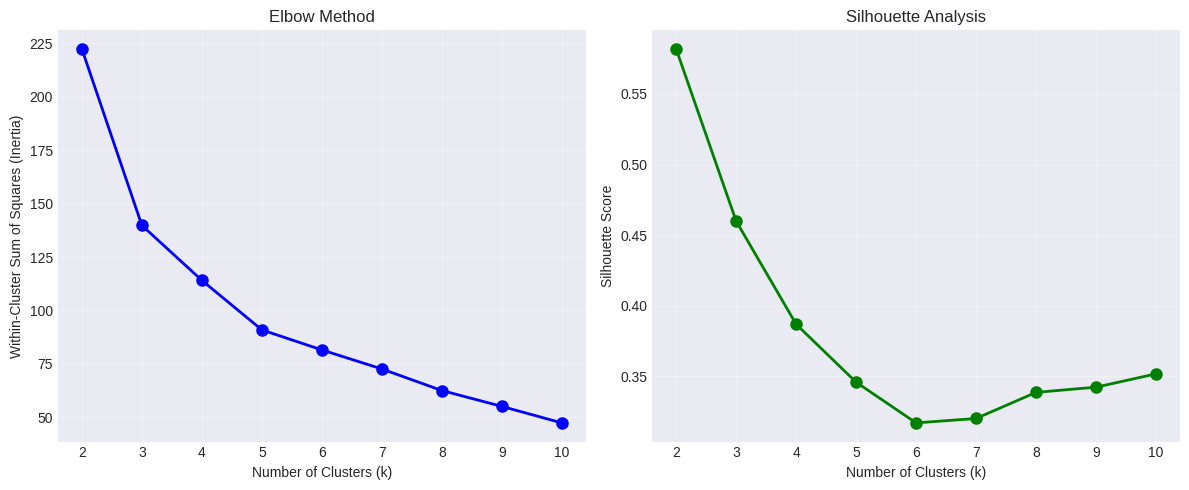

Optimal number of clusters: 3
Best silhouette score: 0.5818

Clustering completed!
Cluster distribution:
  Cluster 0: 53 samples (35.3%)
  Cluster 1: 50 samples (33.3%)
  Cluster 2: 47 samples (31.3%)


In [11]:
# ============================================================================
# TODO: Apply K-Means Clustering
# 1. Determine optimal number of clusters (elbow method or silhouette analysis)
# 2. Train K-Means with optimal k
# 3. Visualize clusters
# 4. Interpret cluster characteristics
# ============================================================================

# TODO: Determine optimal number of clusters using elbow method
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_unsupervised_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_unsupervised_scaled, kmeans_temp.labels_))

# Visualize elbow method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# TODO: Choose optimal k based on elbow method and silhouette analysis
optimal_k = 3  # Replace with your chosen k

print(f"Optimal number of clusters: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")

# TODO: Train K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_unsupervised_scaled)

print(f"\nClustering completed!")
print(f"Cluster distribution:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(cluster_labels)*100:.1f}%)")


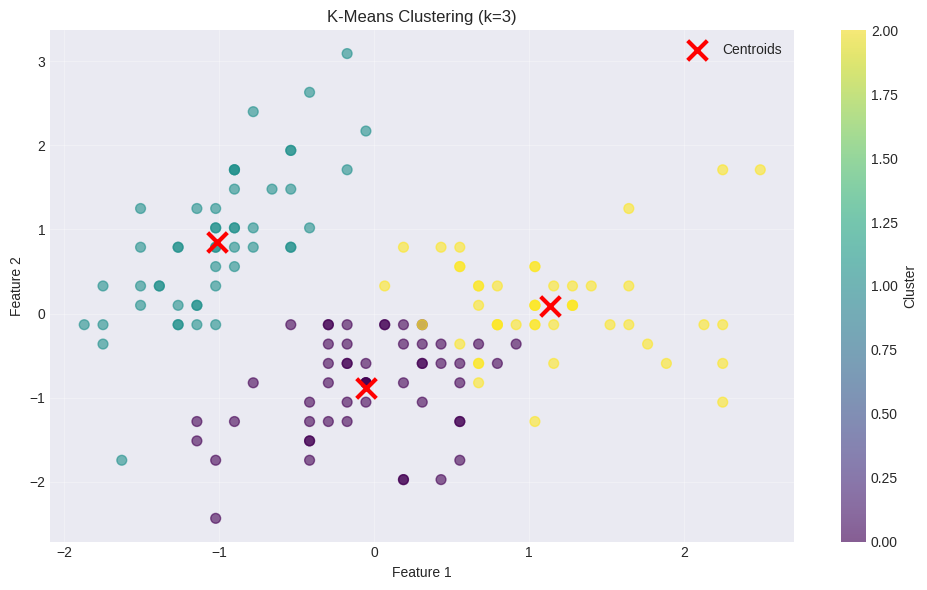


Cluster Characteristics:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)    target  
cluster                              
0                1.413208  1.264151  
1                0.246000  0.000000  
2                1.972340  1.765957  

Interpretation:
What do the clusters represent?
How do clusters differ from each other?
Do clusters align with any known categories in your data?


In [13]:
# TODO: Visualize clusters
# If you have 2D or can reduce to 2D, create scatter plots
# Otherwise, use PCA to reduce dimensions first (see next section)

# Example: If dataset has 2 features or you want to plot first 2 features
if X_unsupervised_scaled.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_unsupervised_scaled[:, 0], X_unsupervised_scaled[:, 1],
                         c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               c='red', marker='x', s=200, linewidths=3, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-Means Clustering (k={optimal_k})')
    plt.legend()
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# TODO: Analyze cluster characteristics
# Add cluster labels to original dataframe for analysis
df_with_clusters = df_clean.copy()
df_with_clusters['cluster'] = cluster_labels

print("\nCluster Characteristics:")
# Fix: Calculate mean only for numeric columns
print(df_with_clusters.groupby('cluster').mean(numeric_only=True))

# TODO: Interpret clusters
print("\nInterpretation:")
print("What do the clusters represent?")
print("How do clusters differ from each other?")
print("Do clusters align with any known categories in your data?")

### Step 4.4: Principal Component Analysis (PCA)

**TODO**: Apply PCA to reduce dimensionality and visualize data in lower dimensions.


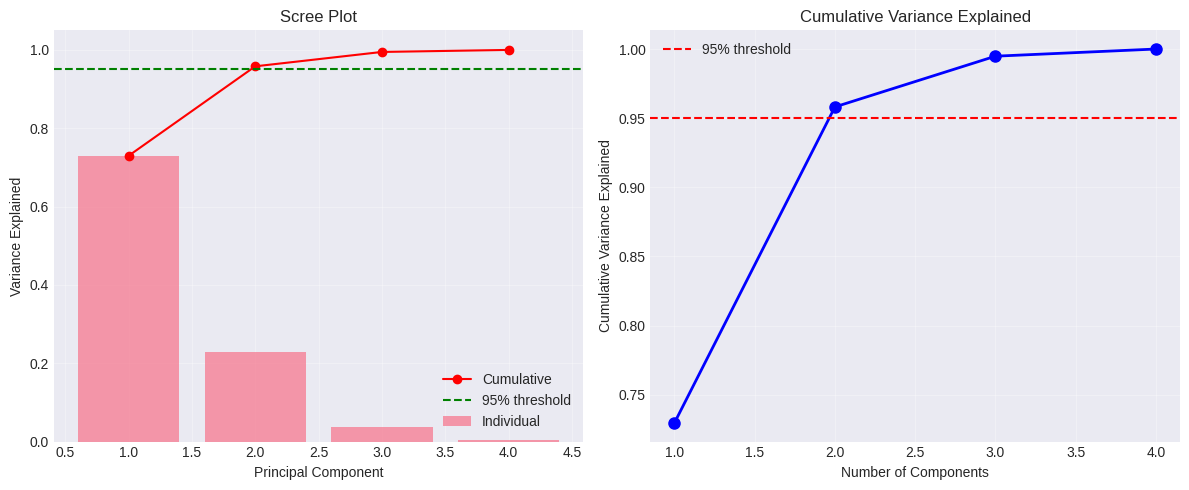

Number of components explaining 95% variance: 2
Variance explained by first 2 components: 95.81%

Variance explained by PC1: 72.96%
Variance explained by PC2: 22.85%
Total variance explained by 2 components: 95.81%


In [14]:
# ============================================================================
# TODO: Apply Principal Component Analysis (PCA)
# 1. Determine number of components to retain (e.g., 95% variance)
# 2. Apply PCA transformation
# 3. Visualize data in 2D using first two principal components
# 4. Interpret principal components
# ============================================================================

# Apply PCA to all components first
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_unsupervised_scaled)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Visualize variance explained
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
        pca_full.explained_variance_ratio_, alpha=0.7, label='Individual')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         'ro-', label='Cumulative')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         'bo-', linewidth=2, markersize=8)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# TODO: Determine number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components_95}")
print(f"Variance explained by first {n_components_95} components: {cumulative_variance[n_components_95-1]:.2%}")

# Apply PCA with 2 components for visualization
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_unsupervised_scaled)

print(f"\nVariance explained by PC1: {pca_2d.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca_2d.explained_variance_ratio_[1]:.2%}")
print(f"Total variance explained by 2 components: {sum(pca_2d.explained_variance_ratio_):.2%}")


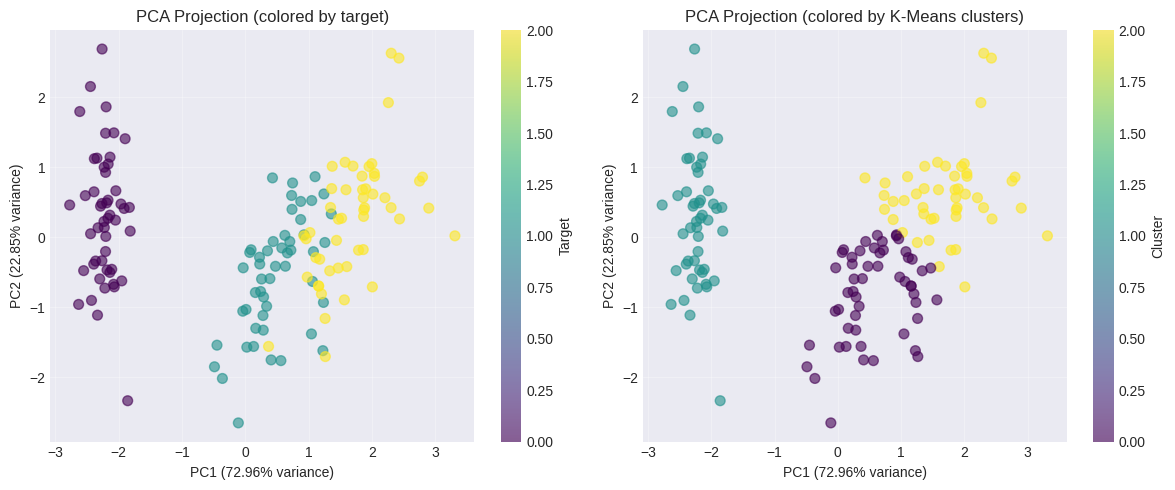


Principal Component Analysis:
First Principal Component (PC1):
  Variance explained: 72.96%

Second Principal Component (PC2):
  Variance explained: 22.85%

Feature contributions to principal components:
                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942

Interpretation:
What patterns do you see in the PCA projection?
Do clusters separate well in the PCA space?
What do the principal components represent?


In [15]:
# TODO: Visualize data in 2D using PCA
plt.figure(figsize=(12, 5))

# Plot 1: PCA projection colored by original target (if available)
plt.subplot(1, 2, 1)
if 'target' in df_clean.columns:
    scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=df_clean['target'],
                         cmap='viridis', s=50, alpha=0.6)
    plt.colorbar(scatter, label='Target')
    plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
    plt.title('PCA Projection (colored by target)')
else:
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], s=50, alpha=0.6)
    plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
    plt.title('PCA Projection')
plt.grid(True, alpha=0.3)

# Plot 2: PCA projection colored by clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels,
                     cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Projection (colored by K-Means clusters)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# TODO: Interpret principal components
print("\nPrincipal Component Analysis:")
print("First Principal Component (PC1):")
print(f"  Variance explained: {pca_2d.explained_variance_ratio_[0]:.2%}")
# TODO: Analyze which features contribute most to PC1

print("\nSecond Principal Component (PC2):")
print(f"  Variance explained: {pca_2d.explained_variance_ratio_[1]:.2%}")
# TODO: Analyze which features contribute most to PC2

# Feature contributions to principal components
if hasattr(pca_2d, 'components_'):
    feature_contributions = pd.DataFrame(
        pca_2d.components_.T,
        columns=['PC1', 'PC2'],
        index=X.columns
    )
    print("\nFeature contributions to principal components:")
    print(feature_contributions)

print("\nInterpretation:")
print("What patterns do you see in the PCA projection?")
print("Do clusters separate well in the PCA space?")
print("What do the principal components represent?")


---

## Part 5: Interpretation and Insights

### Step 5.1: Compare Supervised and Unsupervised Results

**TODO**: Compare what you learned from supervised vs. unsupervised learning.


### Insights and Comparison

**TODO**: Answer the following questions:

1. **Supervised Learning Insights:**
   - Which supervised model performed better? Why?
   - What features were most important for prediction?
   - What are the limitations of your models?

2. **Unsupervised Learning Insights:**
   - How many clusters did you discover? Do they make sense?
   - What characteristics define each cluster?
   - How much variance is explained by the first 2 principal components?

3. **Comparison:**
   - Do the clusters from K-Means align with the target classes from supervised learning?
   - What additional insights did unsupervised learning provide?
   - How do PCA projections relate to your supervised learning results?

4. **Business/Research Implications:**
   - What actionable insights can you derive from your analysis?
   - What recommendations would you make based on your findings?

**Your answers here:**


Cluster vs Actual Class Comparison:
Actual_Class   0   1   2
Cluster                 
0              0  39  14
1             50   0   0
2              0  11  36


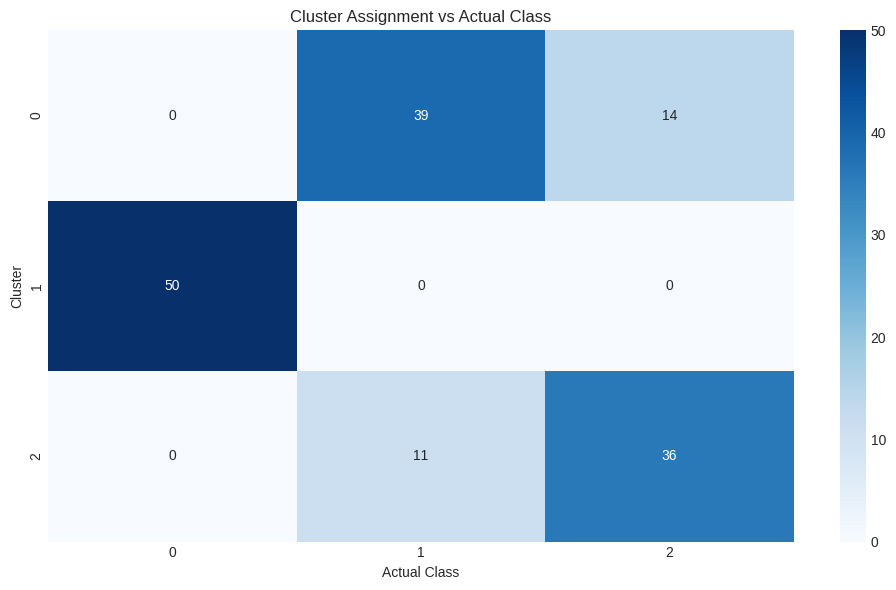


Interpretation:
How well do clusters align with actual classes?
Are there any clusters that correspond to specific classes?


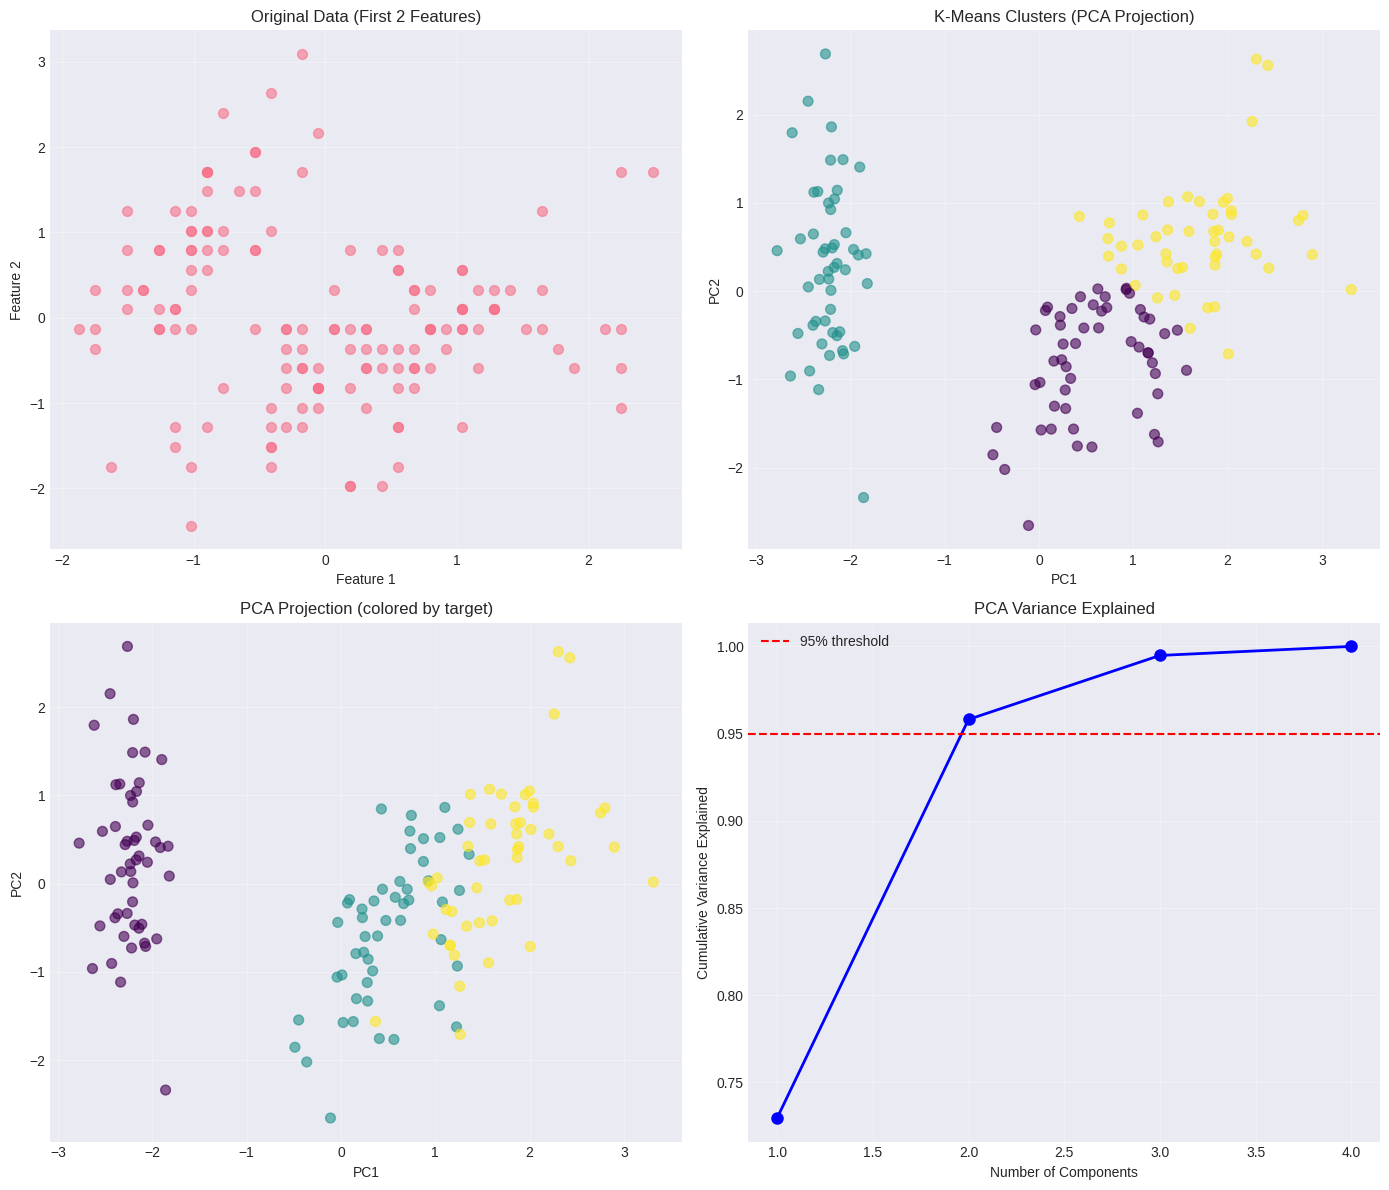

In [16]:
# ============================================================================
# TODO: Create a comprehensive comparison visualization
# Compare supervised predictions with unsupervised clusters
# ============================================================================

# TODO: If you have target labels, compare clusters with actual classes
if 'target' in df_clean.columns:
    # Create cross-tabulation
    comparison_df = pd.DataFrame({
        'Cluster': cluster_labels,
        'Actual_Class': df_clean['target'].values
    })

    crosstab = pd.crosstab(comparison_df['Cluster'], comparison_df['Actual_Class'])
    print("Cluster vs Actual Class Comparison:")
    print(crosstab)

    # Visualize
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Cluster Assignment vs Actual Class')
    plt.xlabel('Actual Class')
    plt.ylabel('Cluster')
    plt.tight_layout()
    plt.show()

    print("\nInterpretation:")
    print("How well do clusters align with actual classes?")
    print("Are there any clusters that correspond to specific classes?")

# TODO: Create summary visualization combining all results
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Original data (if 2D or using first 2 features)
if X_unsupervised_scaled.shape[1] >= 2:
    axes[0, 0].scatter(X_unsupervised_scaled[:, 0], X_unsupervised_scaled[:, 1],
                      s=50, alpha=0.6)
    axes[0, 0].set_title('Original Data (First 2 Features)')
    axes[0, 0].set_xlabel('Feature 1')
    axes[0, 0].set_ylabel('Feature 2')
    axes[0, 0].grid(True, alpha=0.3)

# Plot 2: K-Means clusters
axes[0, 1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels,
                  cmap='viridis', s=50, alpha=0.6)
axes[0, 1].set_title('K-Means Clusters (PCA Projection)')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: PCA colored by target (if available)
if 'target' in df_clean.columns:
    scatter = axes[1, 0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=df_clean['target'],
                               cmap='viridis', s=50, alpha=0.6)
    axes[1, 0].set_title('PCA Projection (colored by target)')
    axes[1, 0].set_xlabel('PC1')
    axes[1, 0].set_ylabel('PC2')
    axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Variance explained
axes[1, 1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
               'bo-', linewidth=2, markersize=8)
axes[1, 1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
axes[1, 1].set_xlabel('Number of Components')
axes[1, 1].set_ylabel('Cumulative Variance Explained')
axes[1, 1].set_title('PCA Variance Explained')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


---

## Part 6: Summary and Reflection

### Step 6.1: Key Findings Summary

**TODO**: Summarize your key findings in the markdown cell below.


### Summary of Key Findings

**TODO**: Write a brief summary (2-3 paragraphs) of your key findings:

1. **Supervised Learning Results:**
   - Best performing model and its metrics
   - Key features that drive predictions

2. **Unsupervised Learning Results:**
   - Number of clusters discovered and their characteristics
   - Dimensionality reduction insights

3. **Overall Insights:**
   - What did you learn about the data?
   - How do supervised and unsupervised results complement each other?

**Your summary here:**


### Step 6.2: Challenges and Learnings

**TODO**: Reflect on challenges faced and what you learned.


### Reflection Questions

**TODO**: Answer the following reflection questions:

1. **Challenges:**
   - What was the most challenging part of this lab?
   - How did you overcome it?

2. **Learnings:**
   - What new concepts or techniques did you learn?
   - What would you do differently if you were to repeat this analysis?

3. **Applications:**
   - How could you apply these techniques to real-world problems?
   - What additional analysis would you like to perform?

**Your reflection here:**


---

## Submission Checklist

Before submitting, ensure you have:

- [ ] Completed all TODO sections
- [ ] Trained and evaluated at least 2 supervised learning models
- [ ] Applied K-Means clustering with appropriate k selection
- [ ] Applied PCA and visualized results
- [ ] Created meaningful visualizations
- [ ] Provided interpretations and insights
- [ ] Documented your code with comments
- [ ] Answered all reflection questions
- [ ] Verified code runs without errors

---

## Additional Resources

- Scikit-learn Documentation: https://scikit-learn.org/stable/
- Pandas Documentation: https://pandas.pydata.org/docs/
- Matplotlib Gallery: https://matplotlib.org/stable/gallery/
- Seaborn Tutorial: https://seaborn.pydata.org/tutorial.html

---

## Grading Rubric

| Criteria | Points | Description |
|----------|--------|-------------|
| Code Completion | 40 | All TODO sections completed, code runs without errors |
| Model Evaluation | 30 | Proper evaluation metrics, meaningful comparisons |
| Data Cleaning | 20 | Appropriate handling of missing values, outliers, preprocessing |
| Documentation | 10 | Clear comments, interpretations, and reflections |

**Total: 100 points**

---

Good luck with your mini-lab! 🚀
